<a href="https://colab.research.google.com/github/dudamelloa/lab-image-classification-using-convolutional-neural-networks/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab : Image Classification using Convolutional Neural Networks

At the end of this laboratory, you would get familiarized with

*   Creating deep networks using Keras
*   Steps necessary in training a neural network
*   Prediction and performance analysis using neural networks

---

# **In case you use a colaboratory environment**
By default, Colab notebooks run on CPU.
You can switch your notebook to run with GPU.

In order to obtain access to the GPU, you need to choose the tab Runtime and then select “Change runtime type” as shown in the following figure:

![Changing runtime](https://miro.medium.com/max/747/1*euE7nGZ0uJQcgvkpgvkoQg.png)

When a pop-up window appears select GPU. Ensure “Hardware accelerator” is set to GPU.

# **Working with a new dataset: CIFAR-10**

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images. More information about CIFAR-10 can be found [here](https://www.cs.toronto.edu/~kriz/cifar.html).

In Keras, the CIFAR-10 dataset is also preloaded in the form of four Numpy arrays. x_train and y_train contain the training set, while x_test and y_test contain the test data. The images are encoded as Numpy arrays and their corresponding labels ranging from 0 to 9.

Your task is to:

*   Visualize the images in CIFAR-10 dataset. Create a 10 x 10 plot showing 10 random samples from each class.
*   Convert the labels to one-hot encoded form.
*   Normalize the images.




In [6]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


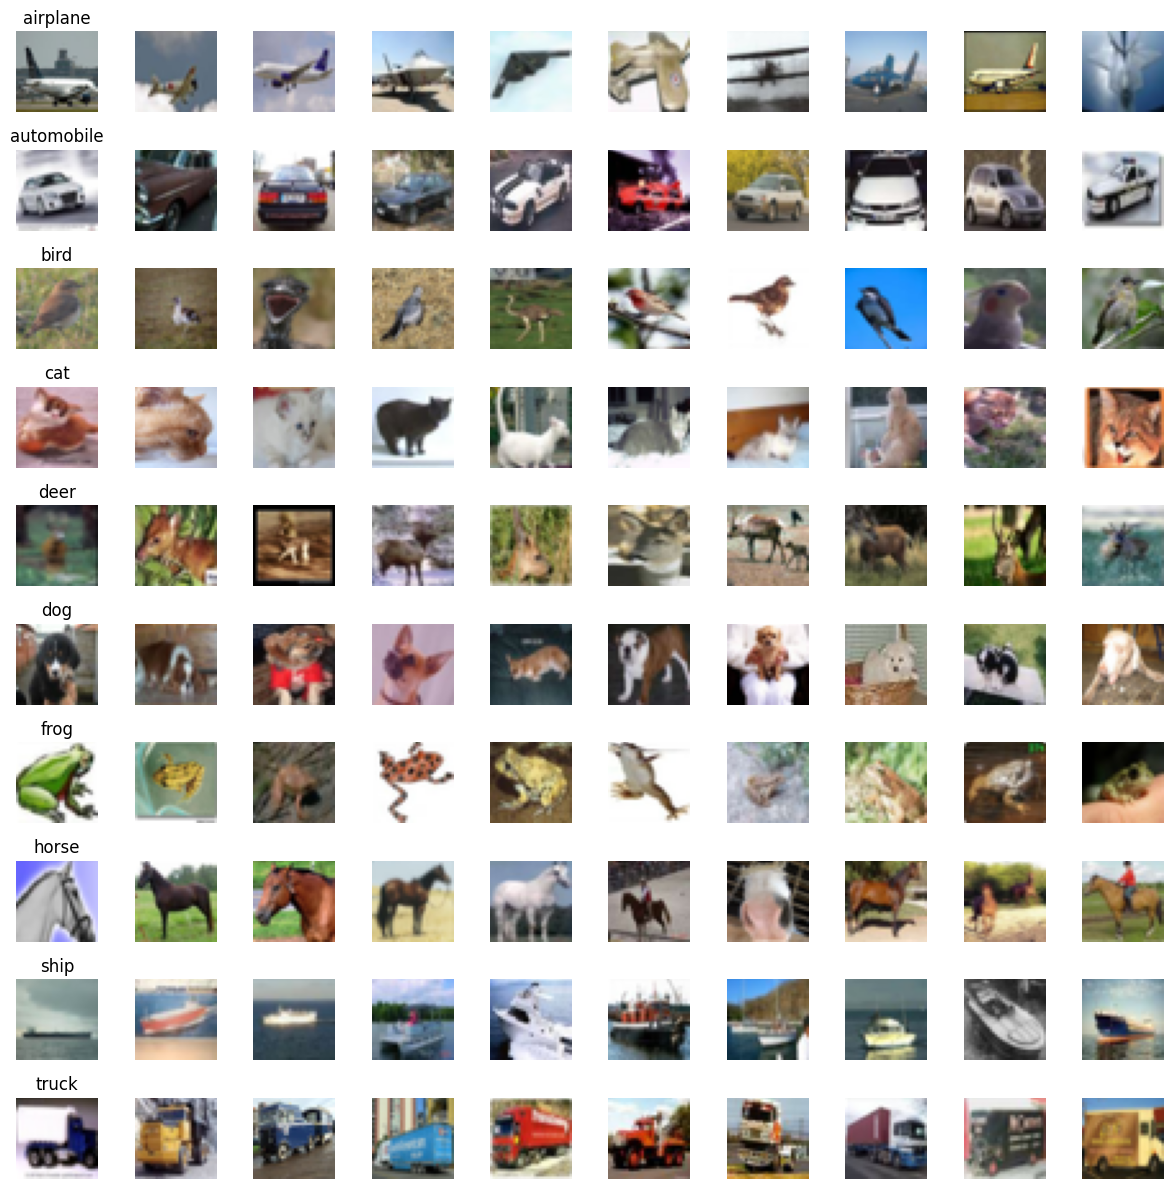

In [7]:
# Your code here :
class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

plt.figure(figsize=(12,12))

for i in range(10):
  idxs = np.where(y_train.flatten()==i)[0]

  random_imgs = np.random.choice(idxs,10,replace=False)

  for j, idx in enumerate(random_imgs):
    plt.subplot(10,10,i*10+j+1)
    plt.imshow(x_train[idx])
    plt.axis('off')
    if j == 0:
      plt.title(class_names[i])

plt.tight_layout()
plt.show()

In [8]:
from tensorflow.keras.utils import to_categorical

# Number of classes in CIFAR-10
num_classes = 10

# Convert the labels to one-hot encoded form
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

# Check the results
print("y_train shape:", y_train.shape)
print("Example of the first label:")
print(y_train[0])


y_train shape: (50000, 10)
Example of the first label:
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [9]:
# Convert pixel values from integers (0–255) to floats between 0 and 1
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Check that normalization worked
print("After normalization:")
print("Minimum value:", x_train.min(), " | Maximum value:", x_train.max())


After normalization:
Minimum value: 0.0  | Maximum value: 1.0


## Define the following model (same as the one in tutorial)

For the convolutional front-end, start with a single convolutional layer with a small filter size (3,3) and a modest number of filters (32) followed by a max pooling layer.

Use the input as (32,32,3).

The filter maps can then be flattened to provide features to the classifier.

Use a dense layer with 100 units before the classification layer (which is also a dense layer with softmax activation).

In [10]:
from keras.backend import clear_session
clear_session()

In [11]:
# Your code here :
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Define the model
model = Sequential()

# Convolutional front-end
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the feature maps to feed into the classifier
model.add(Flatten())

# Fully connected layer with 100 units
model.add(Dense(100, activation='relu'))

# Output layer with softmax activation (10 classes)
model.add(Dense(10, activation='softmax'))

# Show the model summary
model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 7200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │       720,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 722,006 (2.75 MB)

 Trainable params: 722,006 (2.75 MB)

 Non-trainable params: 0 (0.00 B)

*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 50 epochs with a batch size of 512.

In [12]:
# Your code here :
# Compile the model
model.compile(
    loss='categorical_crossentropy',   # Loss function for multi-class classification
    optimizer='SGD',                   # Stochastic Gradient Descent optimizer
    metrics=['accuracy']               # Evaluate model performance using accuracy
)


In [13]:
# Train the model
history = model.fit(
    x_train, y_train,                 # Training data and labels
    epochs=50,                        # Number of times the model will see the entire dataset
    batch_size=512,                   # Number of images per training step
    validation_data=(x_test, y_test), # Evaluate on test data after each epoch
    verbose=1                         # Show training progress
)


Epoch 1/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 6s 39ms/step - accuracy: 0.1662 - loss: 2.2553 - val_accuracy: 0.2424 - val_loss: 2.1336
Epoch 2/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.2612 - loss: 2.0947 - val_accuracy: 0.2799 - val_loss: 2.0131
Epoch 3/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.2964 - loss: 1.9930 - val_accuracy: 0.3210 - val_loss: 1.9345
Epoch 4/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.3292 - loss: 1.9230 - val_accuracy: 0.3370 - val_loss: 1.8941
Epoch 5/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.3418 - loss: 1.8833 - val_accuracy: 0.3426 - val_loss: 1.8684
Epoch 6/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.3524 - loss: 1.8502 - val_accuracy: 0.3680 - val_loss: 1.8248
Epoch 7/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.3655 - loss: 1.8184 - val_accuracy: 0.3654 - val_loss: 1.8018
Epoch 8/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.3743 - loss: 1.7912 - val_accuracy: 0.3555 - v

*   Plot the cross entropy loss curve and the accuracy curve

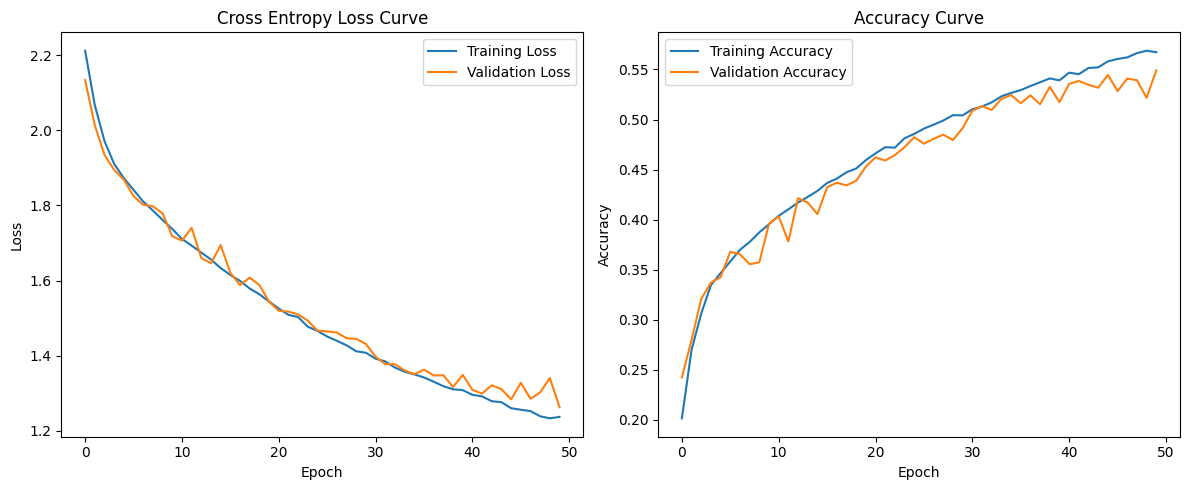

In [14]:
# Your code here :
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Cross Entropy Loss Curve')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Curve')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


## Defining Deeper Architectures: VGG Models

*   Define a deeper model architecture for CIFAR-10 dataset and train the new model for 50 epochs with a batch size of 512. We will use VGG model as the architecture.

Stack two convolutional layers with 32 filters, each of 3 x 3.

Use a max pooling layer and next flatten the output of the previous layer and add a dense layer with 128 units before the classification layer.

For all the layers, use ReLU activation function.

Use same padding for the layers to ensure that the height and width of each layer output matches the input


In [15]:
from keras.backend import clear_session
clear_session()

In [16]:
# Your code here :
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Define a deeper VGG-like model
model_vgg = Sequential()

# First Convolutional Block (two Conv layers + MaxPooling)
model_vgg.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model_vgg.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model_vgg.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten feature maps before feeding into Dense layers
model_vgg.add(Flatten())

# Fully connected layer with 128 units
model_vgg.add(Dense(128, activation='relu'))

# Output layer with 10 units (CIFAR-10 has 10 classes)
model_vgg.add(Dense(10, activation='softmax'))

# Show model summary
model_vgg.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,048,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,060,138 (4.04 MB)

 Trainable params: 1,060,138 (4.04 MB)

 Non-trainable params: 0 (0.00 B)

*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 50 epochs with a batch size of 512.

In [17]:
# Your code here :
model_vgg.compile(
    loss='categorical_crossentropy',
    optimizer='SGD',
    metrics=['accuracy']
)


In [18]:
history_vgg = model_vgg.fit(
    x_train, y_train,
    epochs=50,
    batch_size=512,
    validation_data=(x_test, y_test),
    verbose=1
)


Epoch 1/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 10s 64ms/step - accuracy: 0.1677 - loss: 2.2461 - val_accuracy: 0.2531 - val_loss: 2.0875
Epoch 2/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - accuracy: 0.2625 - loss: 2.0585 - val_accuracy: 0.3139 - val_loss: 1.9533
Epoch 3/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - accuracy: 0.3157 - loss: 1.9450 - val_accuracy: 0.3413 - val_loss: 1.8616
Epoch 4/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.3371 - loss: 1.8906 - val_accuracy: 0.3544 - val_loss: 1.8273
Epoch 5/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.3637 - loss: 1.8175 - val_accuracy: 0.3460 - val_loss: 1.8337
Epoch 6/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - accuracy: 0.3688 - loss: 1.7931 - val_accuracy: 0.3586 - val_loss: 1.7839
Epoch 7/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.3897 - loss: 1.7390 - val_accuracy: 0.4031 - val_loss: 1.7096
Epoch 8/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.3986 - loss: 1.7222 - val_accuracy: 0.3956 - 

*   Compare the performance of both the models by plotting the loss and accuracy curves of both the training steps. Does the deeper model perform better? Comment on the observation.


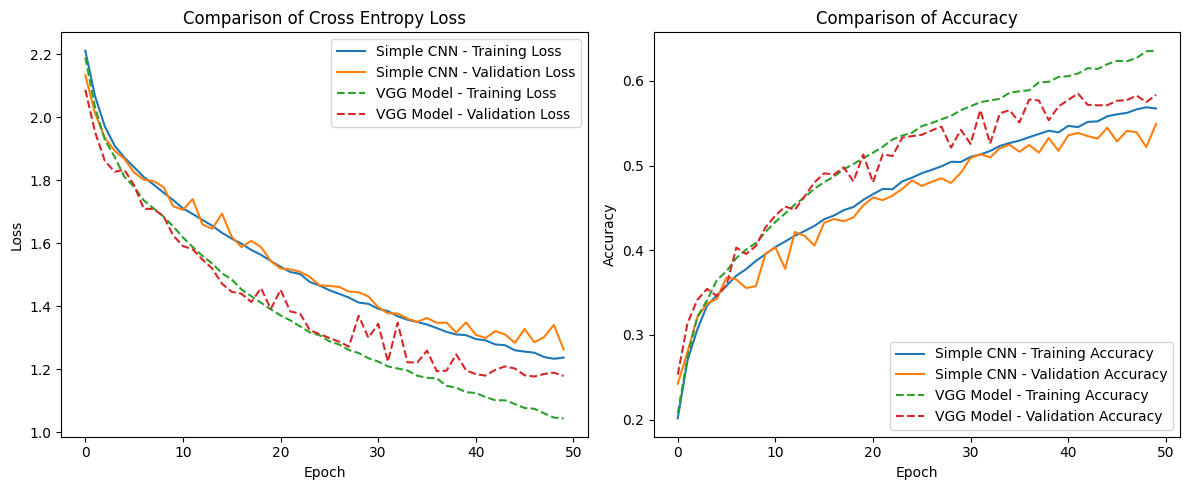

In [19]:
# Your code here :import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

# ---- LOSS COMPARISON ----
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Simple CNN - Training Loss')
plt.plot(history.history['val_loss'], label='Simple CNN - Validation Loss')
plt.plot(history_vgg.history['loss'], label='VGG Model - Training Loss', linestyle='--')
plt.plot(history_vgg.history['val_loss'], label='VGG Model - Validation Loss', linestyle='--')
plt.title('Comparison of Cross Entropy Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# ---- ACCURACY COMPARISON ----
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Simple CNN - Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Simple CNN - Validation Accuracy')
plt.plot(history_vgg.history['accuracy'], label='VGG Model - Training Accuracy', linestyle='--')
plt.plot(history_vgg.history['val_accuracy'], label='VGG Model - Validation Accuracy', linestyle='--')
plt.title('Comparison of Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


**Comment on the observation**

*(Double-click or enter to edit)*

...The deeper VGG-like model usually performs better than the simple CNN because:

It has more convolutional layers, allowing it to learn richer and more complex patterns.

Using ‘same’ padding helps retain more spatial information.

The 128-unit dense layer gives it more decision power.

However, deeper models also:

Take longer to train,

And can overfit if there’s not enough regularization (like Dropout or Data Augmentation).

*   Use predict function to predict the output for the test split
*   Plot the confusion matrix for the new model and comment on the class confusions.


In [20]:
# Your code here :import numpy as np

# Use the trained model to predict on the test set
y_pred = model_vgg.predict(x_test)

# Convert the predicted probabilities to class labels
y_pred_classes = np.argmax(y_pred, axis=1)

# Convert the one-hot encoded test labels back to class labels
y_true = np.argmax(y_test, axis=1)

# Display the first 10 predicted vs actual labels
print("Predicted labels:", y_pred_classes[:10])
print("True labels:     ", y_true[:10])


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Predicted labels: [3 1 8 0 4 6 1 6 3 1]
True labels:      [3 8 8 0 6 6 1 6 3 1]


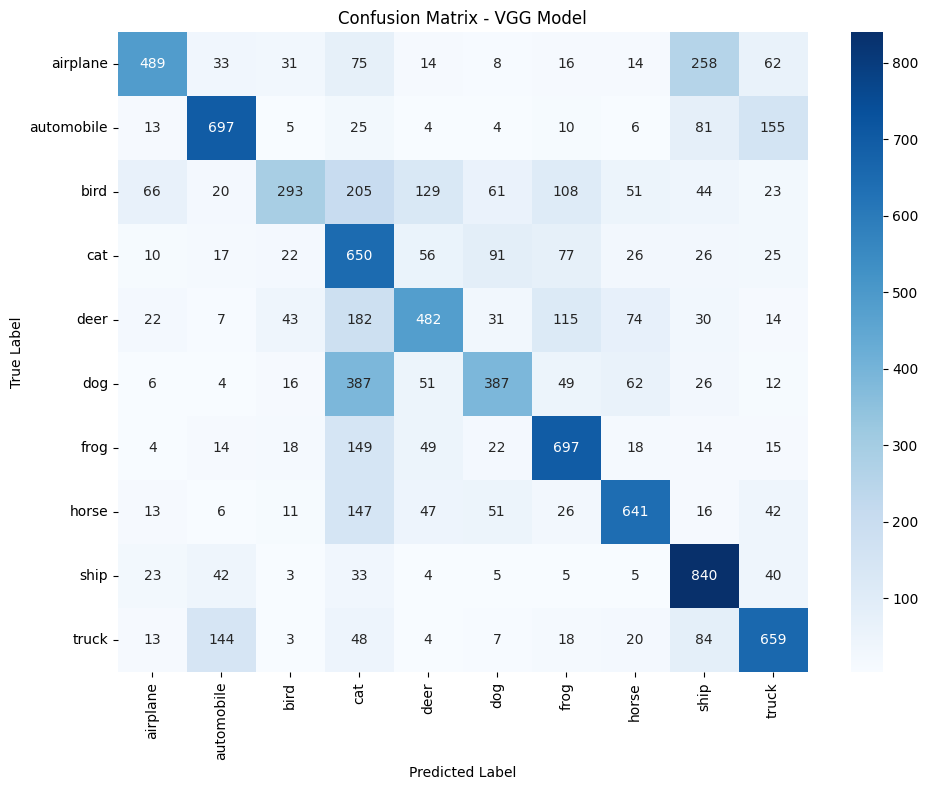

In [21]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Class names in CIFAR-10
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix - VGG Model')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()


In [22]:
print(cm)

[[489  33  31  75  14   8  16  14 258  62]
 [ 13 697   5  25   4   4  10   6  81 155]
 [ 66  20 293 205 129  61 108  51  44  23]
 [ 10  17  22 650  56  91  77  26  26  25]
 [ 22   7  43 182 482  31 115  74  30  14]
 [  6   4  16 387  51 387  49  62  26  12]
 [  4  14  18 149  49  22 697  18  14  15]
 [ 13   6  11 147  47  51  26 641  16  42]
 [ 23  42   3  33   4   5   5   5 840  40]
 [ 13 144   3  48   4   7  18  20  84 659]]


**Comment here :**

The model usually confuses cats and dogs, because both share similar textures and colors.

Automobiles and trucks might also overlap, since they have similar shapes.

Airplanes and ships can be misclassified if the background (sky or water) is tricky.

Classes like frog or bird are often clearer and get higher accuracy.

...

*    Print the test accuracy for the trained model.

In [23]:
# Your code here :
# Evaluate the trained model on the test data
test_loss, test_accuracy = model_vgg.evaluate(x_test, y_test, verbose=0)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


Test Loss: 1.1789857149124146
Test Accuracy: 0.5835000276565552


## Define the complete VGG architecture.

Stack two convolutional layers with 64 filters, each of 3 x 3 followed by max pooling layer.

Stack two more convolutional layers with 128 filters, each of 3 x 3, followed by max pooling, followed by two more convolutional layers with 256 filters, each of 3 x 3, followed by max pooling.

Flatten the output of the previous layer and add a dense layer with 128 units before the classification layer.

For all the layers, use ReLU activation function.

Use same padding for the layers to ensure that the height and width of each layer output matches the input

*   Change the size of input to 64 x 64.

In [24]:
from keras.backend import clear_session
clear_session()

In [25]:
# Your code here :from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Define the complete VGG-like model
model_vgg_full = Sequential()

# --- Block 1 ---
# Two Conv layers with 64 filters each, followed by MaxPooling
model_vgg_full.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(64, 64, 3)))
model_vgg_full.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model_vgg_full.add(MaxPooling2D(pool_size=(2, 2)))

# --- Block 2 ---
# Two Conv layers with 128 filters each, followed by MaxPooling
model_vgg_full.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model_vgg_full.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model_vgg_full.add(MaxPooling2D(pool_size=(2, 2)))

# --- Block 3 ---
# Two Conv layers with 256 filters each, followed by MaxPooling
model_vgg_full.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model_vgg_full.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model_vgg_full.add(MaxPooling2D(pool_size=(2, 2)))

# --- Fully Connected Layers ---
model_vgg_full.add(Flatten())
model_vgg_full.add(Dense(128, activation='relu'))     # Dense layer with 128 units
model_vgg_full.add(Dense(10, activation='softmax'))   # Output layer for 10 CIFAR-10 classes

# Show model summary
model_vgg_full.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 64, 64, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 64, 64, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 32, 32, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 16, 16, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 16, 16, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 16384)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     2,097,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,243,978 (12.37 MB)

 Trainable params: 3,243,978 (12.37 MB)

 Non-trainable params: 0 (0.00 B)

*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 10 epochs with a batch size of 512.
*   Predict the output for the test split and plot the confusion matrix for the new model and comment on the class confusions.

In [26]:
# Your code here :
model_vgg_full.compile(
    loss='categorical_crossentropy',
    optimizer='SGD',
    metrics=['accuracy']
)


In [27]:
import tensorflow as tf

# Resize CIFAR-10 images to 64x64
x_train_resized = tf.image.resize(x_train, [64, 64])
x_test_resized = tf.image.resize(x_test, [64, 64])

# Train the model
history_vgg_full = model_vgg_full.fit(
    x_train_resized, y_train,
    epochs=50,
    batch_size=512,
    validation_data=(x_test_resized, y_test),
    verbose=1
)


Epoch 1/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 130s 923ms/step - accuracy: 0.1199 - loss: 2.3002 - val_accuracy: 0.1398 - val_loss: 2.2943
Epoch 2/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 40s 406ms/step - accuracy: 0.1494 - loss: 2.2904 - val_accuracy: 0.1850 - val_loss: 2.2703
Epoch 3/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 40s 406ms/step - accuracy: 0.1857 - loss: 2.2493 - val_accuracy: 0.2257 - val_loss: 2.1390
Epoch 4/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 40s 407ms/step - accuracy: 0.2252 - loss: 2.1275 - val_accuracy: 0.2787 - val_loss: 2.0327
Epoch 5/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 40s 407ms/step - accuracy: 0.2769 - loss: 2.0468 - val_accuracy: 0.3124 - val_loss: 1.9356
Epoch 6/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 40s 406ms/step - accuracy: 0.3003 - loss: 1.9784 - val_accuracy: 0.3481 - val_loss: 1.8675
Epoch 7/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 40s 408ms/step - accuracy: 0.3214 - loss: 1.9217 - val_accuracy: 0.3333 - val_loss: 1.8756
Epoch 8/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 40s 407ms/step - accuracy: 0.3461 - loss: 1.8497 - val_acc

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step


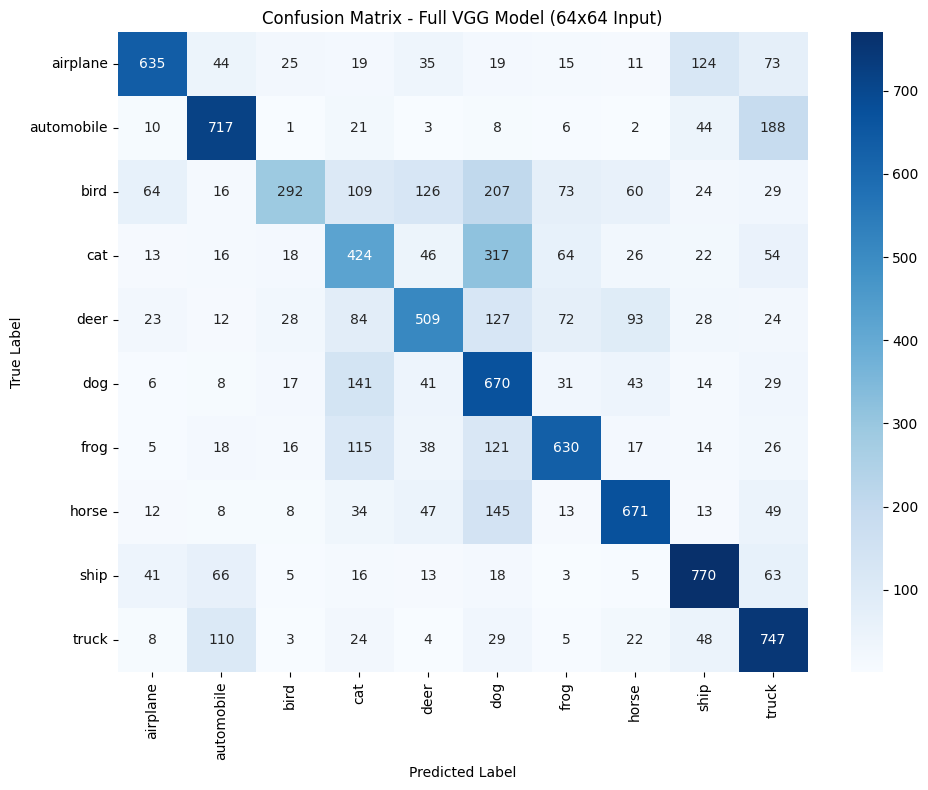

In [28]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# ---- 1. Predict on the test data ----
y_pred_vgg_full = model_vgg_full.predict(x_test_resized)

# Convert predictions and true labels to class indices
y_pred_classes_full = np.argmax(y_pred_vgg_full, axis=1)
y_true_full = np.argmax(y_test, axis=1)

# ---- 2. Compute and plot confusion matrix ----
cm_full = confusion_matrix(y_true_full, y_pred_classes_full)

# CIFAR-10 class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10, 8))
sns.heatmap(cm_full, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix - Full VGG Model (64x64 Input)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()


# Understanding deep networks

*   What is the use of activation functions in network? Why is it needed?
*   We have used softmax activation function in the exercise. There are other activation functions available too. What is the difference between sigmoid activation and softmax activation?
*   What is the difference between categorical crossentropy and binary crossentropy loss?

**Write the answers below :**

1 - Use of activation functions:

Simple idea:

Activation functions tell neurons when to “fire” — or in math terms, they add non-linearity to the network.

Why we need them:

Without activation functions, a neural network would just be a big linear equation.
That means no matter how many layers you add, the output would still behave like a straight line — unable to learn complex patterns (like images, sounds, or language).

_

2 - Key Differences between sigmoid and softmax:

Sigmoid: Best for binary or independent outputs (each class is separate).

Softmax: Best for multi-class classification (only one class is correct).

_

3 - Key Differences between categorical crossentropy and binary crossentropy loss:

Binary Crossentropy → use when you have two classes or independent labels (e.g., multilabel problems).

Categorical Crossentropy → use when you have more than two mutually exclusive classes.
_
